In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## parmaters 1
ConsiderTC1 = 1
ConsiderMB1 = 1
informal1 = 0.11
discount1 = 0.02
scenario1 = 'val'

## parmaters 2
ConsiderTC2 = 1
ConsiderMB2 = 1
informal2 = 0
discount2 = 0.02
scenario2 = 'val'


In [3]:
# only keep results
df_input = pd.read_csv('results/aggregate_results_imputed.csv')
# df_input = pd.read_csv('imputation/aggregate_results_imputed.csv')

df = df_input[(df_input['discount']==discount1)&
        (df_input['ConsiderTC']==ConsiderTC1)&
        (df_input['ConsiderMB']==ConsiderMB1)&
        (df_input['informal']==informal1)&
        (df_input['discount']==discount1)&
        (df_input['scenario']==scenario1)]
df = df.reset_index().drop(columns=['index'])
df = df[df['tax'] > 0]

df2 = df_input[(df_input['discount']==discount2)&
        (df_input['ConsiderTC']==ConsiderTC2)&
        (df_input['ConsiderMB']==ConsiderMB2)&
        (df_input['informal']==informal2)&
        (df_input['discount']==discount2)&
        (df_input['scenario']==scenario2)]
df2 = df2.reset_index().drop(columns=['index'])
df2 = df2[df2['tax'] > 0]

df = df.groupby('Country Code').sum().reset_index()
df2 = df2.groupby('Country Code').sum().reset_index()

countries_info = pd.read_csv('data/dl1_countrycodeorg_country_name.csv')
countries_info = countries_info[['Country Code', 'Region', 'Income group']]
codemap = countries_info.dropna()
df = df.merge(codemap, on='Country Code')
df2 = df2.merge(codemap, on='Country Code')

print(df.head())
print(len(df))

  Country Code  ConsiderTC  ConsiderMB  informal  discount     GDPloss  \
0          AFG           1           1      0.11      0.02   22.410657   
1          AGO           1           1      0.11      0.02   35.724203   
2          ALB           1           1      0.11      0.02   16.803161   
3          AND           1           1      0.11      0.02    2.402919   
4          ARE           1           1      0.11      0.02  472.668150   

        tax       pc_loss                      Region         Income group  
0  0.012531    428.391475                  South Asia           Low income  
1  0.007213    672.841907          Sub-Saharan Africa  Lower middle income  
2  0.012591   6236.385288       Europe & Central Asia  Upper middle income  
3  0.020177  30970.229696       Europe & Central Asia          High income  
4  0.022068  44998.854065  Middle East & North Africa          High income  
199


In [4]:
df2

,Country Code,ConsiderTC,ConsiderMB,informal,discount,GDPloss,tax,pc_loss,Region,Income group
0,AFG,1,1,0.0,0.02,3.819825,0.002136,73.017960,South Asia,Low income
1,AGO,1,1,0.0,0.02,6.630500,0.001339,124.881120,Sub-Saharan Africa,Lower middle income
2,ALB,1,1,0.0,0.02,1.755808,0.001316,651.656890,Europe & Central Asia,Upper middle income
3,AND,1,1,0.0,0.02,0.384456,0.003228,4955.092564,Europe & Central Asia,High income
4,ARE,1,1,0.0,0.02,74.730118,0.003489,7114.441023,Middle East & North Africa,High income
...,...,...,...,...,...,...,...,...,...,...
194,WSM,1,1,0.0,0.02,0.141304,0.003579,608.056540,East Asia & Pacific,Lower middle income
195,YEM,1,1,0.0,0.02,4.390001,0.001666,111.475725,Middle East & North Africa,Low income
196,ZAF,1,1,0.0,0.02,57.211091,0.002906,837.309826,Sub-Saharan Africa,Upper middle income
197,ZMB,1,1,0.0,0.02,3.191375,0.001455,113.635501,Sub-Saharan Africa,Lower middle income


In [5]:
data = df[['GDPloss','Country Code']].merge(df2[['GDPloss','Country Code']],on='Country Code')

In [6]:
data['TC'] = 1-data['GDPloss_y']/data['GDPloss_x']

In [7]:
data

,GDPloss_x,Country Code,GDPloss_y,TC
0,22.410657,AFG,3.819825,0.829553
1,35.724203,AGO,6.630500,0.814398
2,16.803161,ALB,1.755808,0.895507
3,2.402919,AND,0.384456,0.840005
4,472.668150,ARE,74.730118,0.841897
...,...,...,...,...
194,0.897256,WSM,0.141304,0.842515
195,24.793319,YEM,4.390001,0.822936
196,260.439316,ZAF,57.211091,0.780329
197,13.860056,ZMB,3.191375,0.769743


In [8]:
data[data['Country Code']=='CHN']

,GDPloss_x,Country Code,GDPloss_y,TC
34,14672.143284,CHN,3042.48435,0.792635


In [9]:
data[data['Country Code']=='USA']

,GDPloss_x,Country Code,GDPloss_y,TC
188,19973.274201,USA,5199.336337,0.739685


In [10]:
data.sort_values('TC', ascending=False)

,GDPloss_x,Country Code,GDPloss_y,TC
100,10.001639,LBN,0.329456,0.967060
186,23.464186,UKR,1.048936,0.955296
77,126.370841,HRV,8.600469,0.931943
81,15628.898219,IND,1089.460710,0.930292
70,146.065271,GRC,10.886143,0.925471
...,...,...,...,...
92,51.511792,KEN,15.652081,0.696146
140,116.790221,PER,44.334699,0.620390
123,14.520812,MOZ,5.766488,0.602881
52,67.289223,ECU,27.314014,0.594080


In [11]:
ratio = (1-df2.groupby('Income group').sum()['GDPloss']/df.groupby('Income group').sum()['GDPloss']).to_frame('TC')
ratio = ratio.sort_values('TC')*100
ratio = ratio.reset_index()
ratio

,Income group,TC
0,High income,78.823915
1,Upper middle income,80.273143
2,Low income,83.571667
3,Lower middle income,89.492149


In [12]:
df2

,Country Code,ConsiderTC,ConsiderMB,informal,discount,GDPloss,tax,pc_loss,Region,Income group
0,AFG,1,1,0.0,0.02,3.819825,0.002136,73.017960,South Asia,Low income
1,AGO,1,1,0.0,0.02,6.630500,0.001339,124.881120,Sub-Saharan Africa,Lower middle income
2,ALB,1,1,0.0,0.02,1.755808,0.001316,651.656890,Europe & Central Asia,Upper middle income
3,AND,1,1,0.0,0.02,0.384456,0.003228,4955.092564,Europe & Central Asia,High income
4,ARE,1,1,0.0,0.02,74.730118,0.003489,7114.441023,Middle East & North Africa,High income
...,...,...,...,...,...,...,...,...,...,...
194,WSM,1,1,0.0,0.02,0.141304,0.003579,608.056540,East Asia & Pacific,Lower middle income
195,YEM,1,1,0.0,0.02,4.390001,0.001666,111.475725,Middle East & North Africa,Low income
196,ZAF,1,1,0.0,0.02,57.211091,0.002906,837.309826,Sub-Saharan Africa,Upper middle income
197,ZMB,1,1,0.0,0.02,3.191375,0.001455,113.635501,Sub-Saharan Africa,Lower middle income


/Users/caozhong/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


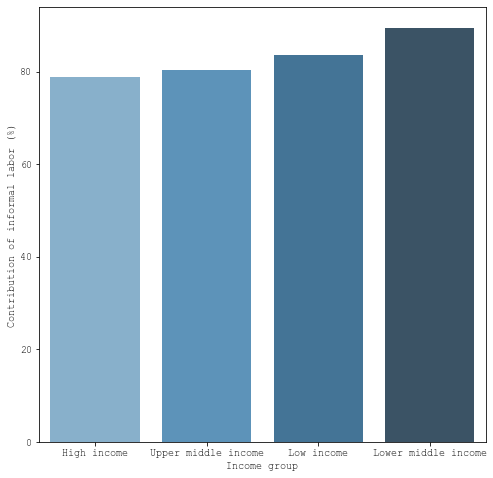

In [13]:
plt.rcParams['font.family']='Courier New, monospace'
fig, ax = plt.subplots(figsize=(8,8))  # create figure & 1 axis
ax = sns.barplot("Income group", y="TC", data=ratio, palette="Blues_d")
ax.set_ylabel('Contribution of informal labor (%)')
plt.savefig('tables/figure_S6.pdf')

In [14]:
ratio = (1 - df2.groupby('Region').sum()['GDPloss']/df.groupby('Region').sum()['GDPloss']).to_frame('TC')
ratio = ratio.sort_values('TC')*100
ratio = ratio.reset_index()
ratio

,Region,TC
0,North America,74.335141
1,Latin America & Caribbean,77.307054
2,East Asia & Pacific,80.042536
3,Sub-Saharan Africa,81.868906
4,Middle East & North Africa,82.890378
5,Europe & Central Asia,83.673828
6,South Asia,92.713927


/Users/caozhong/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


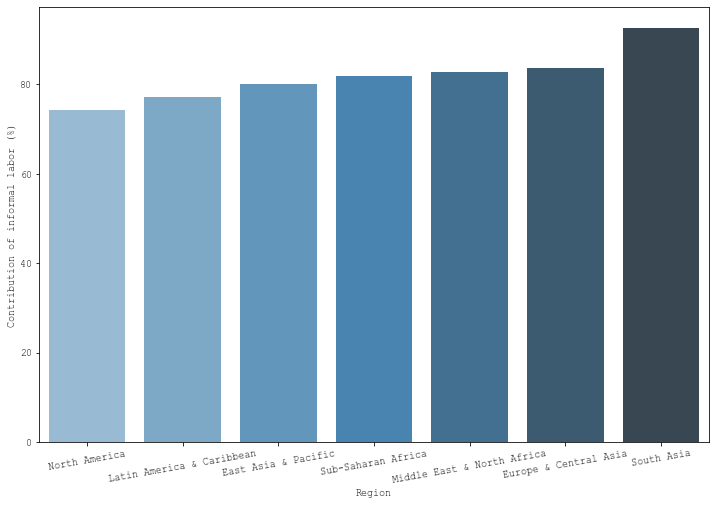

In [15]:
fig, ax = plt.subplots(figsize=(12,8))  # create figure & 1 axis
ax = sns.barplot("Region", y="TC", data=ratio, palette="Blues_d")
ax.set_ylabel('Contribution of informal labor (%)')
plt.xticks(rotation=10)
plt.savefig('tables/figure_S7.pdf')